In [9]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

trdt=pd.read_csv('C:\\Users\\Ant Pc\\GitHub\\MNIST1\\train.csv')
tstdt=pd.read_csv('C:\\Users\\Ant Pc\\GitHub\\MNIST1\\test.csv')

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)


In [2]:
print(trdt.shape)
print(tstdt.shape)

#28x28 pixel values flattened to represent 784 pixel values in between 0 to 255 one extra label in between 0 and 9 for the train dataset.

(42000, 785)
(28000, 784)


Label is 4


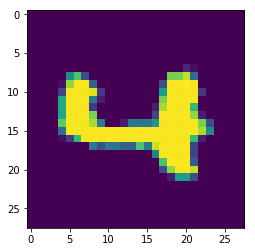

In [3]:
#let's see what images look like

n=490 #see what the nth row in the csv file has as an image and label

#1st column represents image label for each row
imagearray=trdt.iloc[n,1:785].values #convert to numpy array
imagearray=imagearray.reshape([28,28]) #reshape the flattened array to 28x28 dimensional image

print('Label is ' +str(trdt.iloc[n,0]))
plt.imshow(imagearray)

In [3]:
xtrain=trdt.copy()
label=xtrain['label']
xtrain.drop(['label'],axis=1, inplace=True)
xtrain.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fully Connected Regression Neural Network.
P.S. I am not Crazy, It's just an experiment.

In [5]:
#let us try a fully connected neural network
model = Sequential()
model.add(Dense(units=32, activation='sigmoid',input_shape=(784,))) #input layer with 784 input neurons and 32 output neurons
model.add(Dense(units=64, activation='sigmoid')) #No need to give input dimensions for hidden or output layers, keras automatically does that 
model.add(Dense(units=1)) #eliminating the activation function since we are going to treat this a regression network.
#Chill I am just experimenting to see the difference in output accuracies, I know this is a classification problem and not a regression one.

model.summary() #printing the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 27,297
Trainable params: 27,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
919/919 [==============================] - 2s 2ms/step - loss: 4.8105 - mean_squared_error: 4.8105 - val_loss: 4.5895 - val_mean_squared_error: 4.5895
Epoch 2/500
919/919 [==============================] - 2s 2ms/step - loss: 4.9155 - mean_squared_error: 4.9155 - val_loss: 4.9033 - val_mean_squared_error: 4.9033
Epoch 3/500
919/919 [==============================] - 2s 2ms/step - loss: 4.5699 - mean_squared_error: 4.5699 - val_loss: 4.1459 - val_mean_squared_error: 4.1459
Epoch 4/500
919/919 [==============================] - 2s 2ms/step - loss: 4.6186 - mean_squared_error: 4.6186 - val_loss: 4.7411 - val_mean_squared_error: 4.7411
Epoch 5/500
919/919 [==============================] - 2s 2ms/step - loss: 4.5173 - mean_squared_error: 4.5173 - val_loss: 4.4746 - val_mean_squared_error: 4.4746
Epoch 6/500
919/919 [==============================] - 2s 2ms/step - loss: 4.3479 - mean_squared_error: 4.3479 - val_loss: 4.2803 - val_mean_squared_error: 4.2803
Epoch 7/500
919/919 [=

919/919 [==============================] - 2s 2ms/step - loss: 3.1725 - mean_squared_error: 3.1725 - val_loss: 3.1856 - val_mean_squared_error: 3.1856
Epoch 52/500
919/919 [==============================] - 2s 2ms/step - loss: 3.0269 - mean_squared_error: 3.0269 - val_loss: 3.0292 - val_mean_squared_error: 3.0292
Epoch 53/500
919/919 [==============================] - 2s 2ms/step - loss: 3.3600 - mean_squared_error: 3.3600 - val_loss: 3.5315 - val_mean_squared_error: 3.5315
Epoch 54/500
919/919 [==============================] - 2s 2ms/step - loss: 3.2623 - mean_squared_error: 3.2623 - val_loss: 3.1601 - val_mean_squared_error: 3.1601
Epoch 55/500
919/919 [==============================] - 2s 2ms/step - loss: 3.1567 - mean_squared_error: 3.1567 - val_loss: 2.9924 - val_mean_squared_error: 2.9924
Epoch 56/500
919/919 [==============================] - 2s 2ms/step - loss: 3.1532 - mean_squared_error: 3.1532 - val_loss: 3.6877 - val_mean_squared_error: 3.6877
Epoch 57/500
919/919 [=======

919/919 [==============================] - 2s 2ms/step - loss: 3.2673 - mean_squared_error: 3.2673 - val_loss: 3.2140 - val_mean_squared_error: 3.2140
Epoch 102/500
919/919 [==============================] - 2s 2ms/step - loss: 3.1170 - mean_squared_error: 3.1170 - val_loss: 3.1358 - val_mean_squared_error: 3.1358
Epoch 103/500
919/919 [==============================] - 2s 2ms/step - loss: 3.0698 - mean_squared_error: 3.0698 - val_loss: 3.1534 - val_mean_squared_error: 3.1534
Epoch 104/500
919/919 [==============================] - 2s 2ms/step - loss: 2.9944 - mean_squared_error: 2.9944 - val_loss: 2.9962 - val_mean_squared_error: 2.9962
Epoch 105/500
919/919 [==============================] - 2s 2ms/step - loss: 2.9323 - mean_squared_error: 2.9323 - val_loss: 2.9888 - val_mean_squared_error: 2.9888
Epoch 106/500
919/919 [==============================] - 2s 2ms/step - loss: 3.0211 - mean_squared_error: 3.0211 - val_loss: 3.1005 - val_mean_squared_error: 3.1005
Epoch 107/500
919/919 [=

Epoch 151/500
919/919 [==============================] - 2s 2ms/step - loss: 2.5977 - mean_squared_error: 2.5977 - val_loss: 2.5650 - val_mean_squared_error: 2.5650
Epoch 152/500
919/919 [==============================] - 2s 2ms/step - loss: 2.5605 - mean_squared_error: 2.5605 - val_loss: 2.6147 - val_mean_squared_error: 2.6147
Epoch 153/500
919/919 [==============================] - 2s 2ms/step - loss: 2.5601 - mean_squared_error: 2.5601 - val_loss: 2.5652 - val_mean_squared_error: 2.5652
Epoch 154/500
919/919 [==============================] - 2s 2ms/step - loss: 2.5448 - mean_squared_error: 2.5448 - val_loss: 2.6060 - val_mean_squared_error: 2.6060
Epoch 155/500
919/919 [==============================] - 2s 2ms/step - loss: 2.5801 - mean_squared_error: 2.5801 - val_loss: 2.7110 - val_mean_squared_error: 2.7110
Epoch 156/500
919/919 [==============================] - 2s 2ms/step - loss: 2.5732 - mean_squared_error: 2.5732 - val_loss: 2.6262 - val_mean_squared_error: 2.6262
Epoch 157/

Epoch 250/500
919/919 [==============================] - 2s 2ms/step - loss: 2.3169 - mean_squared_error: 2.3169 - val_loss: 2.2630 - val_mean_squared_error: 2.2630
Epoch 251/500
919/919 [==============================] - 2s 2ms/step - loss: 2.4308 - mean_squared_error: 2.4308 - val_loss: 2.4789 - val_mean_squared_error: 2.4789
Epoch 252/500
919/919 [==============================] - 2s 2ms/step - loss: 2.4497 - mean_squared_error: 2.4497 - val_loss: 2.4247 - val_mean_squared_error: 2.4247
Epoch 253/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2797 - mean_squared_error: 2.2797 - val_loss: 2.2122 - val_mean_squared_error: 2.2122
Epoch 254/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2188 - mean_squared_error: 2.2188 - val_loss: 2.2329 - val_mean_squared_error: 2.2329
Epoch 255/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2433 - mean_squared_error: 2.2433 - val_loss: 2.2398 - val_mean_squared_error: 2.2398
Epoch 256/

Epoch 349/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2914 - mean_squared_error: 2.2914 - val_loss: 2.2453 - val_mean_squared_error: 2.2453
Epoch 350/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2000 - mean_squared_error: 2.2000 - val_loss: 2.2815 - val_mean_squared_error: 2.2815
Epoch 351/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2062 - mean_squared_error: 2.2062 - val_loss: 2.2012 - val_mean_squared_error: 2.2012
Epoch 352/500
919/919 [==============================] - 2s 2ms/step - loss: 2.1648 - mean_squared_error: 2.1648 - val_loss: 2.2130 - val_mean_squared_error: 2.2130
Epoch 353/500
919/919 [==============================] - 2s 2ms/step - loss: 2.1767 - mean_squared_error: 2.1767 - val_loss: 2.1578 - val_mean_squared_error: 2.1578
Epoch 354/500
919/919 [==============================] - 2s 2ms/step - loss: 2.1834 - mean_squared_error: 2.1834 - val_loss: 2.1922 - val_mean_squared_error: 2.1922
Epoch 355/

Epoch 448/500
919/919 [==============================] - 2s 2ms/step - loss: 2.3252 - mean_squared_error: 2.3252 - val_loss: 2.6198 - val_mean_squared_error: 2.6198
Epoch 449/500
919/919 [==============================] - 2s 2ms/step - loss: 2.4772 - mean_squared_error: 2.4772 - val_loss: 2.5519 - val_mean_squared_error: 2.5519
Epoch 450/500
919/919 [==============================] - 2s 2ms/step - loss: 2.4260 - mean_squared_error: 2.4260 - val_loss: 2.2955 - val_mean_squared_error: 2.2955
Epoch 451/500
919/919 [==============================] - 2s 2ms/step - loss: 2.2366 - mean_squared_error: 2.2366 - val_loss: 2.3022 - val_mean_squared_error: 2.3022
Epoch 452/500
919/919 [==============================] - 3s 3ms/step - loss: 2.2580 - mean_squared_error: 2.2580 - val_loss: 2.2616 - val_mean_squared_error: 2.2616
Epoch 453/500
919/919 [==============================] - 4s 4ms/step - loss: 2.2393 - mean_squared_error: 2.2393 - val_loss: 2.3272 - val_mean_squared_error: 2.3272
Epoch 454/

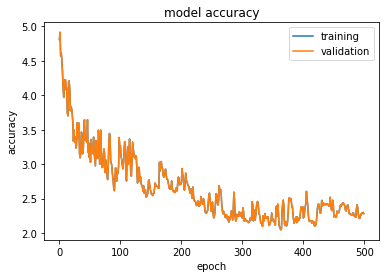

In [8]:
model.compile(optimizer="sgd", loss='mean_squared_error', metrics=['mean_squared_error'])
history=model.fit(xtrain,label.values.reshape(42000,1),batch_size=32, epochs=500,validation_split=.3)
#reduce batch size if your GPU memory is insufficient

#plotting training and valiadtion losses
plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


Read more about Optimisers [here](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)

In [17]:
Image(url="https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif", width=500, height=500)

In [13]:
#let us see how well our model performs in kaggle
pred = model.predict(tstdt)

pred=pred.round(0)
pred=pd.DataFrame(pred)

pred.to_csv('RegressionFC.csv')

Score: 0.39896/1.0000 Pretty Bad

Now, Fully Connected Classification Neural Network

In [4]:
# First One hot encode 
nclasses = 10
ytrain = keras.utils.to_categorical(label, nclasses)
ytrain

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
model = Sequential()
model.add(Dense(units=32, activation='sigmoid',input_shape=(784,)))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=10,activation='softmax')) 
#softmax activation function implies output is 0 to 1 and can be intepreted as probability that each image is a particular label 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
919/919 [==============================] - 2s 2ms/step - loss: 0.3361 - accuracy: 0.9033 - val_loss: 0.3626 - val_accuracy: 0.8938
Epoch 2/100
919/919 [==============================] - 2s 2ms/step - loss: 0.3324 - accuracy: 0.9034 - val_loss: 0.3433 - val_accuracy: 0.9018
Epoch 3/100
919/919 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.9072 - val_loss: 0.3306 - val_accuracy: 0.9013
Epoch 4/100
919/919 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.9072 - val_loss: 0.3200 - val_accuracy: 0.9043
Epoch 5/100
919/919 [==============================] - 2s 3ms/step - loss: 0.3168 - accuracy: 0.9068 - val_loss: 0.3399 - val_accuracy: 0.8976
Epoch 6/100
919/919 [==============================] - 2s 2ms/step - loss: 0.3136 - accuracy: 0.9070 - val_loss: 0.3223 - val_accuracy: 0.9033
Epoch 7/100
919/919 [==============================] - 3s 3ms/step - loss: 0.3024 - accuracy: 0.9125 - val_loss: 0.3236 - val_accuracy: 0.9031

Epoch 58/100
919/919 [==============================] - 2s 3ms/step - loss: 0.2475 - accuracy: 0.9232 - val_loss: 0.2812 - val_accuracy: 0.9140
Epoch 59/100
919/919 [==============================] - 2s 2ms/step - loss: 0.2447 - accuracy: 0.9237 - val_loss: 0.2666 - val_accuracy: 0.9218
Epoch 60/100
919/919 [==============================] - 2s 3ms/step - loss: 0.2328 - accuracy: 0.9294 - val_loss: 0.2523 - val_accuracy: 0.9236
Epoch 61/100
919/919 [==============================] - 2s 2ms/step - loss: 0.2361 - accuracy: 0.9272 - val_loss: 0.2614 - val_accuracy: 0.9196
Epoch 62/100
919/919 [==============================] - 2s 2ms/step - loss: 0.2489 - accuracy: 0.9240 - val_loss: 0.2778 - val_accuracy: 0.9145
Epoch 63/100
919/919 [==============================] - 2s 2ms/step - loss: 0.2541 - accuracy: 0.9240 - val_loss: 0.2639 - val_accuracy: 0.9221
Epoch 64/100
919/919 [==============================] - 2s 2ms/step - loss: 0.2613 - accuracy: 0.9207 - val_loss: 0.2757 - val_accuracy:

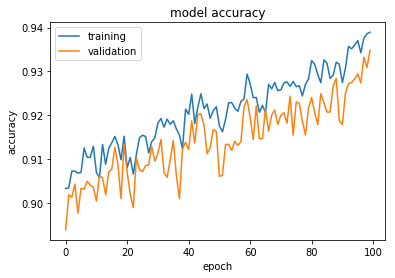

In [29]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=32, epochs=100, validation_split=.3)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [30]:
pred = model.predict(tstdt)
pred=np.argmax(pred, axis=1) #taking the label with maximum probability 
pred=pd.DataFrame(pred)
pred.to_csv('ClassificationFC.csv')

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=xtrain.reshape(42000, 28, 28, 1),y=ytrain, epochs=10)

pred = model.predict(xtest.reshape(28000, 28, 28, 1))
pred=np.argmax(pred, axis=1)
pred=pd.DataFrame(pred)
pred.to_csv('pred.csv')


Epoch 1/10
42000/42000 [==============================] - 32s 763us/step - loss: 1.0576 - accuracy: 0.8054
Epoch 2/10
42000/42000 [==============================] - 28s 668us/step - loss: 0.3455 - accuracy: 0.9044
Epoch 3/10
42000/42000 [==============================] - 24s 572us/step - loss: 0.2508 - accuracy: 0.9298
Epoch 4/10
42000/42000 [==============================] - 29s 696us/step - loss: 0.2292 - accuracy: 0.9365
Epoch 5/10
42000/42000 [==============================] - 25s 588us/step - loss: 0.1941 - accuracy: 0.9469
Epoch 6/10
42000/42000 [==============================] - 26s 629us/step - loss: 0.1859 - accuracy: 0.9494
Epoch 7/10
42000/42000 [==============================] - 29s 699us/step - loss: 0.1945 - accuracy: 0.9463
Epoch 8/10
42000/42000 [==============================] - 32s 771us/step - loss: 0.1483 - accuracy: 0.9577
Epoch 9/10
42000/42000 [==============================] - 29s 695us/step - loss: 0.1544 - accuracy: 0.9596
Epoch 10/10
42000/42000 [===========

0.93/1.0 Not Bad. In just 15 epochs Classification NN overcame 500 epochs of Regression NN by A LOT. Nothing Surprising here except the extent to which just one activation function i.e. softmax can make such a huge difference.

To know layer width,layer depth experiment results for Classification FC, read this [Post](https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3)

Now let us use Convolution Neural Network. Though it doesnot matter much in this case. Read below to find out why.

Convolution is a mathematical operation used to extract the fetaures from an image. Convolution basically reduces the 
feature space size of an image. Image matrix values cannot be taken directly as an input because large images have usually millions of parameters and we need wayyy too muchhh computation and memory requirements.MNIST images are just 28x28, images can be as big as 3840x2180 for e.g. background images of your wide screen desktops. In order to extract a smaller matrix that preserves pixel relations from input image matrix, convolution operation is used.

Learn more about CNN in this awesome post [here](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)

In [10]:
Image(url='https://miro.medium.com/max/1037/1*kYSsNpy0b3fIonQya66VSQ.png', width=500, height=500)

In [7]:
height=28 #image height
width=28
nchannels=1 #this is a balck and white image, for RGB image, channels will be 3 i.e 3 dimensional matrix e.g. (28,28,3)

#CNN takes image matrix itself as input

model=Sequential()
#CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(height, width, nchannels)))

#FILTERS same as kernels here there are 32 filters convolved onto the image sequentially.
#kernel acts as a filter in the Convolution operation, read more in the post above
#padding is when filter with a given stride doesnot fit the input image perfrectly
#padding is set as same: means the inout matrix is padded so that output feature vector after convolution has the same size as the input image vector
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

#Flatten the matrix
model.add(Flatten())
#FC
model.add(Dense(128, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6422656   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 6,442,762
Trainable params: 6,442,762
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
919/919 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0977 - val_loss: nan - val_accuracy: 0.1002
Epoch 2/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 3/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 4/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 5/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 6/100
919/919 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 7/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 8/100
919/919 [====================

919/919 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 61/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 62/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 63/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 64/100
919/919 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 65/100
919/919 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 66/100
919/919 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.1002
Epoch 67/100
919/919 [=========================

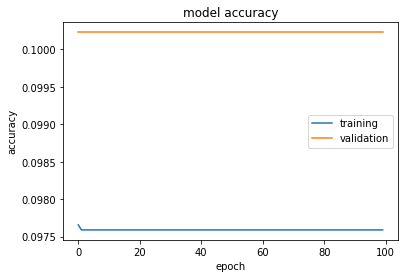

In [8]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain.values.reshape(42000,28,28,1), ytrain, batch_size=32, epochs=100, validation_split=.3)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Wowww things went real bad. Try and guess why?

Maybe network was just too small. Let's try a bigger model.
P.S. beware of your GPU's memory, temperature, computation time.

In [13]:
height=28 #image height
width=28
nchannels=1 #this is a balck and white image, for RGB image, channels will be 3 i.e 3 dimensional matrix e.g. (28,28,3)

#CNN takes image matrix itself as input

model=Sequential()
#CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(height, width, nchannels)))

#FILTERS same as kernels here there are 32 filters convolved onto the image sequentially.
#kernel acts as a filter in the Convolution operation, read more in the post above
#padding is when filter with a given stride doesnot fit the input image perfrectly
#padding is set as same: means the inout matrix is padded so that output feature vector after convolution has the same size as the input image vector
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

#Flatten the matrix
model.add(Flatten())
#FC
model.add(Dense(1280, activation='relu'))
model.add(Dense(1280, activation='relu'))
model.add(Dense(1280, activation='relu'))

model.add(Dense(280, activation='relu'))
model.add(Dense(280, activation='relu'))
model.add(Dense(280, activation='relu'))

model.add(Dense(nclasses, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1280)              64226560  
_________________________________________________________________
dense_12 (Dense)             (None, 1280)              1639680   
_________________________________________________________________
dense_13 (Dense)             (None, 1280)              1639680   
_________________________________________________________________
dense_14 (Dense)             (None, 280)              

Epoch 1/30
919/919 [==============================] - 9s 9ms/step - loss: 0.4279 - accuracy: 0.8947 - val_loss: 0.1254 - val_accuracy: 0.9622
Epoch 2/30
919/919 [==============================] - 8s 9ms/step - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0737 - val_accuracy: 0.9787
Epoch 3/30
919/919 [==============================] - 8s 9ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 4/30
919/919 [==============================] - 8s 9ms/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0716 - val_accuracy: 0.9804
Epoch 5/30
919/919 [==============================] - 8s 9ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0735 - val_accuracy: 0.9821
Epoch 6/30
919/919 [==============================] - 9s 9ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.0787 - val_accuracy: 0.9803
Epoch 7/30
919/919 [==============================] - 8s 9ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0834 - val_accuracy: 0.9821
Epoch 

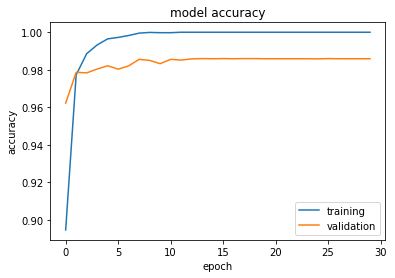

In [14]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain.values.reshape(42000,28,28,1), ytrain, batch_size=32, epochs=30, validation_split=.3)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

It worked.But at what cost.It occupied almost 5.0 GB of VRAM(i.e. GPU Memory) by the end, not to mention the huge time of 9 seconds for each epoch.(Agreed that model is a little too big, given that in just 2nd epoch model accuracy went very high and the model also seems to overfit a little. But you get the point, i.e. small networks are not going cut it on 28x28 images, at this rate imagine the sizes of neural nets required for 3820x2140 images.)

In [15]:
Image(url='https://i.imgflip.com/4/2a6bn7.jpg',width=500, height=500)

Lets workaround this by using MaxPooling.

Pooling layers section would reduce the number of parameters when the images are too large.

(*le reader:But just 8 jupyter cells ago you said MNIST images are not all that bigg. What the hell????). 

(*le my conscience: No one will ever count the number of cells before which you said MNIST images are small, you moron. I bet no one will even try to crosscheck.)

Hmmm,Please ignore my innerself. Comming back, Let me explain, we had a 28x28 image which we then used 32 filters to convolve which resulted in a matrix of size (None, 28, 28, 64).Refer the model summary diagram above.

Now look at the flattened image feature size in the same summary diagram, 50176.And the next layer has 1280 neurons with full connection implies number of trainable parameters=50176*1280(weights)+1280(biases one for each output from flatten layer)=64,226,560. Huuugeee number of tranable parameters between just 2 layers. If you keep claculating like this, you will get a total of 68,043,586 trainable parameters as opposed to the insanely small number of parameters to achieve the same accuracy using just a simple classification neural network i.e. 27,882 trainable parameters(A 2300% increase in number of parameters required).

So now we have established that even when using a small 28x28 image, to achieve high accuracy simple convolution is not enough. We need something more to classify more efficiently. And the answer is Pooling.

Pooling basically reduces the already reduced feature space AND preserves the pixel relation. Learn more about pooling [here](https://medium.com/analytics-vidhya/deep-learning-methods-1700548a3093). Scroll down directly to the pooling section.

What's max pooling see image below for a very intuitive image.
Don't miss this [post](https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9) on pooling methods comparison.

Enough Chit-Chat let's start implementing code(Which Jupyter is actually made for :) )

In [16]:
Image(url='https://miro.medium.com/max/1338/1*SmiydxM5lbTjoKWYPiuzWQ.png', width=500,height=500)

In [17]:
height=28 #image height
width=28
nchannels=1 #this is a balck and white image, for RGB image, channels will be 3 i.e 3 dimensional matrix e.g. (28,28,3)

#CNN takes image matrix itself as input

model=Sequential()
#CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(height, width, nchannels)))
model.add(MaxPooling2D(pool_size=(2,2)))
#FILTERS same as kernels here there are 32 filters convolved onto the image sequentially.
#kernel acts as a filter in the Convolution operation, read more in the post above
#padding is when filter with a given stride doesnot fit the input image perfrectly
#padding is set as same: means the inout matrix is padded so that output feature vector after convolution has the same size as the input image vector
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten the matrix
model.add(Flatten())
#FC
model.add(Dense(128, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

Notice the output of flattened layer reduced to just 3136 from original 50176. Thus enabling model to be trained better with wayyy less number of dense layers. See below to confirm.

Epoch 1/30
919/919 [==============================] - 2s 3ms/step - loss: 3.8422 - accuracy: 0.4326 - val_loss: 0.7148 - val_accuracy: 0.7902
Epoch 2/30
919/919 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.8247 - val_loss: 0.4601 - val_accuracy: 0.8508
Epoch 3/30
919/919 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.8589 - val_loss: 0.4168 - val_accuracy: 0.8672
Epoch 4/30
919/919 [==============================] - 2s 2ms/step - loss: 0.3898 - accuracy: 0.8764 - val_loss: 0.3620 - val_accuracy: 0.8834
Epoch 5/30
919/919 [==============================] - 2s 2ms/step - loss: 0.3452 - accuracy: 0.8901 - val_loss: 0.3552 - val_accuracy: 0.8818
Epoch 6/30
919/919 [==============================] - 2s 2ms/step - loss: 0.3159 - accuracy: 0.8982 - val_loss: 0.3009 - val_accuracy: 0.9045
Epoch 7/30
919/919 [==============================] - 2s 3ms/step - loss: 0.2837 - accuracy: 0.9090 - val_loss: 0.2651 - val_accuracy: 0.9137
Epoch 

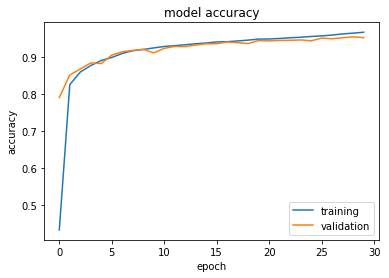

In [18]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain.values.reshape(42000,28,28,1), ytrain, batch_size=32, epochs=30, validation_split=.3)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Alright, Now that we have discussed most of CNN basics (one thing we are going to see later is MNIST image preprocessing.). Let's try and achieve a very high score possible by a neural network on MNIST digit classification Kaggle.

P.S. I don't believe that 1.000 score on kaggle as geniune Deep Learning output.See [this](https://www.kaggle.com/c/digit-recognizer/discussion/7059) to know why. I may be wrong.Please send the model if you come across geniune 1.000 score capable models. I am curious.

Enough, speculation, Now back to the best [model](https://medium.com/@lvarruda/how-to-get-top-2-position-on-kaggles-mnist-digit-recognizer-48185d80a2d4) I could find. 

Let's implement the same model for a lack of time, it is better to experiment, tweak around and get your own model rather than just using somebody else's.

Send me if you develop or find better models.

(42000, 785)
{1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795}
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          36928     
________________

590/590 [==============================] - 7s 11ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 14/30
590/590 [==============================] - 7s 11ms/step - loss: 0.0392 - accuracy: 0.9888 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 15/30
590/590 [==============================] - 7s 11ms/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.0366 - val_accuracy: 0.9893
Epoch 16/30
590/590 [==============================] - 7s 11ms/step - loss: 0.0334 - accuracy: 0.9905 - val_loss: 0.0327 - val_accuracy: 0.9914
Epoch 17/30
590/590 [==============================] - 7s 11ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 18/30
590/590 [==============================] - 7s 11ms/step - loss: 0.0338 - accuracy: 0.9903 - val_loss: 0.0282 - val_accuracy: 0.9921
Epoch 19/30
590/590 [==============================] - 7s 11ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.0237 - val_accuracy: 0.9921
Epoc

132/132 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9945
Test accuracy:  0.994523823261261
Saved model to disk


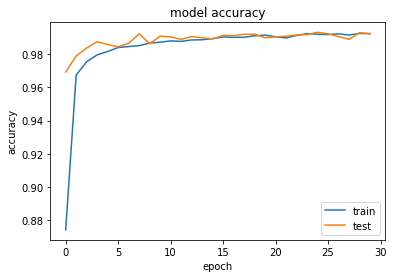

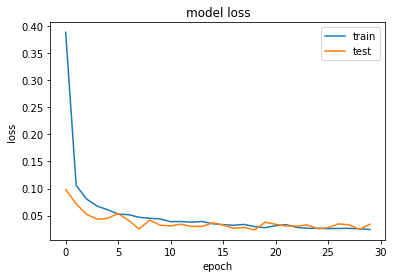

(28000, 784)
Base model scores:
[[411   0   0   0   0   0   0   0   0   0]
 [  0 484   0   0   0   0   0   0   1   0]
 [  0   0 400   0   0   0   0   1   2   0]
 [  0   0   0 415   0   0   0   0   3   0]
 [  0   0   0   0 456   0   2   0   0   3]
 [  0   0   0   0   0 370   0   0   2   0]
 [  0   0   0   0   0   0 412   0   1   0]
 [  0   0   0   0   0   0   0 446   0   0]
 [  0   0   0   0   0   0   0   0 381   1]
 [  0   0   0   1   3   0   0   3   0 402]]
Elapsed time: 00:03:23


In [23]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


def init_model():

    ###  Model Definition
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Valid', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Valid', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(519, activation="relu"))  # [[521,0.9962,70],[519,0.9969,51]
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=["accuracy"])
    print(model.summary())

    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)  # , preprocessing_function=random_add_or_erase_spot)

    return model,datagen

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils.np_utils import to_categorical

import time
start_time = time.time()

# Load the data
train = pd.read_csv("C:\\Users\\Ant Pc\\GitHub\\MNIST1\\train.csv")
print(train.shape)

#Prepare dataset
y = train["label"]
X = train.drop("label", axis = 1)
print(y.value_counts().to_dict())
y = to_categorical(y, num_classes = 10)
del train

X = X / 255.0
X = X.values.reshape(-1,28,28,1)

# Shuffle Split Train and Test from original dataset
seed=2
train_index, valid_index = ShuffleSplit(n_splits=1,
                                        train_size=0.9,
                                        test_size=None,
                                        random_state=seed).split(X).__next__()
x_train = X[train_index]
Y_train = y[train_index]
x_test = X[valid_index]
Y_test = y[valid_index]

# Parameters
epochs = 30
batch_size = 64
validation_steps = 10000

# initialize Model, Annealer and Datagen
model, datagen = init_model()

# Start training
train_generator = datagen.flow(x_train, Y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, Y_test, batch_size=batch_size)

history = model.fit_generator(train_generator,
                    steps_per_epoch=x_train.shape[0]//batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=validation_steps//batch_size,
                    )

score = model.evaluate(x_test, Y_test)
print('Test accuracy: ', score[1])

# Saving Model for future API
model.save('Digits-1.3.0.h5')
print("Saved model to disk")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Model predict
test = pd.read_csv("C:\\Users\\Ant Pc\\GitHub\\MNIST1\\test.csv")
print(test.shape)
test = test / 255
test = test.values.reshape(-1, 28, 28, 1)
p = np.argmax(model.predict(test), axis=1)

print('Base model scores:')
valid_loss, valid_acc = model.evaluate(x_test, Y_test, verbose=0)
valid_p = np.argmax(model.predict(x_test), axis=1)
target = np.argmax(Y_test, axis=1)
cm = confusion_matrix(target, valid_p)
print(cm)

## Preparing file for submission
submission = pd.DataFrame(pd.Series(range(1, p.shape[0] + 1), name='ImageId'))
submission['Label'] = p
filename="keras-cnn-{0}.csv".format(str(int(score[1]*10000)))
submission.to_csv(filename, index=False)

elapsed_time = time.time() - start_time
print("Elapsed time: {0}".format(time.strftime("%H:%M:%S", time.gmtime(elapsed_time))))

We have 0.99425 score on kaggle as the article promised if you have seen it.

You can look at the model summary rather than code if you get too tired and implement it on your own. Also look at the datagen variable in model function. This is basically preprocessing an image i.e. things like rotating the image or cropping it or increasing contarst. Preprocessing of images has to be done experimentally and is a topic for next time.

Alright See you Guys next time with GAN's. Bye.